Нам предстоит выяснить, от каких самых малоприбыльных рейсов из Анапы мы можем отказаться в зимнее время.

Исходим из того, что прибыльность рейса — это разница между доходом от продаж билетов и расходом на полет.

Самая простая модель оценки прибыльности: стоимость билетов - стоимость топлива на рейс.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime

In [2]:
#display.[max_categories, max_columns, max_colwidth, max_info_columns, max_info_rows, max_rows, min_rows]
pd.set_option('display.max_rows', 50) # показывать указанное количество строк
pd.set_option('display.max_columns', 50) # показывать указанное количество колонок
pd.options.display.float_format = '{:,.1f}'.format
#Проинициализируем seaborn
sns.set()

In [3]:
flights = pd.read_csv('flight_anapa_winter_2017.csv')

Посмотрим на загруженный датасет

In [4]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   flight_id            127 non-null    int64 
 1   flight_no            127 non-null    object
 2   departure_city       127 non-null    object
 3   arrival_city         127 non-null    object
 4   scheduled_departure  127 non-null    object
 5   scheduled_arrival    127 non-null    object
 6   flight_time_minutes  127 non-null    int64 
 7   model                127 non-null    object
 8   count_economy        127 non-null    int64 
 9   boarding_economy     127 non-null    int64 
 10  amount_economy       127 non-null    int64 
 11  count_comfort        127 non-null    int64 
 12  boarding_comfort     127 non-null    int64 
 13  amount_comfort       127 non-null    int64 
 14  count_business       127 non-null    int64 
 15  boarding_business    127 non-null    int64 
 16  amount_b

In [5]:
flights.sample(10)

,flight_id,flight_no,departure_city,arrival_city,scheduled_departure,scheduled_arrival,flight_time_minutes,model,count_economy,boarding_economy,amount_economy,count_comfort,boarding_comfort,amount_comfort,count_business,boarding_business,amount_business
114,136871,PG0480,Anapa,Belgorod,2017-01-13 09:25:00.000000,2017-01-13 10:15:00.000000,50,Sukhoi Superjet-100,85,85,538500,0,0,0,12,12,226800
31,136310,PG0252,Anapa,Moscow,2017-01-22 10:05:00.000000,2017-01-22 11:45:00.000000,100,Boeing 737-300,118,108,1324800,0,0,0,12,9,329400
9,136164,PG0252,Anapa,Moscow,2017-01-07 10:05:00.000000,2017-01-07 11:45:00.000000,99,Boeing 737-300,118,109,1335800,0,0,0,12,11,402600
88,136709,PG0480,Anapa,Belgorod,2017-01-15 09:25:00.000000,2017-01-15 10:15:00.000000,50,Sukhoi Superjet-100,85,76,481800,0,0,0,12,11,207900
120,136922,PG0480,Anapa,Belgorod,2017-02-11 09:25:00.000000,2017-02-11 10:15:00.000000,50,Sukhoi Superjet-100,85,66,418800,0,0,0,12,10,189000
89,136720,PG0480,Anapa,Belgorod,2017-01-26 09:25:00.000000,2017-01-26 10:15:00.000000,50,Sukhoi Superjet-100,85,83,525900,0,0,0,12,12,226800
115,136875,PG0480,Anapa,Belgorod,2017-02-16 09:25:00.000000,2017-02-16 10:15:00.000000,50,Sukhoi Superjet-100,85,85,538500,0,0,0,12,12,226800
21,136250,PG0252,Anapa,Moscow,2017-02-08 10:05:00.000000,2017-02-08 11:45:00.000000,101,Boeing 737-300,118,91,1115000,0,0,0,12,8,292800
86,136678,PG0480,Anapa,Belgorod,2017-01-28 09:25:00.000000,2017-01-28 10:15:00.000000,50,Sukhoi Superjet-100,85,70,442200,0,0,0,12,10,189000
109,136844,PG0480,Anapa,Belgorod,2017-02-28 09:25:00.000000,2017-02-28 10:15:00.000000,50,Sukhoi Superjet-100,85,73,461700,0,0,0,12,6,113400


In [6]:
flights.describe()

,flight_id,flight_time_minutes,count_economy,boarding_economy,amount_economy,count_comfort,boarding_comfort,amount_comfort,count_business,boarding_business,amount_business
count,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0
mean,"136,533.6",91.4,102.7,84.4,"817,275.6",0.0,0.0,0.0,12.0,10.0,"275,855.9"
std,252.5,64.4,16.5,27.0,"436,962.9",0.0,0.0,0.0,0.0,3.1,"120,638.9"
min,"136,119.0",49.0,85.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0
25%,"136,313.0",50.0,85.0,78.0,"494,100.0",0.0,0.0,0.0,12.0,10.0,"207,900.0"
50%,"136,540.0",99.0,118.0,85.0,"538,500.0",0.0,0.0,0.0,12.0,11.0,"226,800.0"
75%,"136,757.5",100.0,118.0,101.0,"1,238,200.0",0.0,0.0,0.0,12.0,12.0,"402,600.0"
max,"136,956.0",312.0,118.0,118.0,"1,446,800.0",0.0,0.0,0.0,12.0,12.0,"439,200.0"


Датасет содержит данные, о рейсах из Анапы за зимний период 2017 года

- flight_id - идентификатор рейса
- flight_no - Номер рейса
- departure_city - Город отправления
- arrival_city - Город прибытия
- scheduled_departure - Время вылета по расписанию
- scheduled_arrival - Время прилета по расписанию
- flight_time_minutes - Время полета
- model - Модель самолета
- count_economy - Количество мест в самолете класса эконом
- boarding_economy - Количество занятых мест класса эконом
- amount_economy - Стоимость проданных билетов на рейс класса эконом
- count_comfort - Количество мест в самолете класса комфорт
- boarding_comfort - Количество занятых мест класса комфорт
- amount_comfort - Стоимость проданных билетов на рейс класса комфорт
- count_business - Количество мест в самолете класса бизнес
- boarding_business - Количество занятых мест класса бизнес
- amount_business - Стоимость проданных билетов на рейс класса бизнес


Столбцы класса комфорт не содержат полезной информации. Удалим их.

In [7]:
flights.drop(['count_comfort', 'boarding_comfort', 'amount_comfort'], inplace=True, axis=1)

In [8]:
flights.isnull().sum()

flight_id              0
flight_no              0
departure_city         0
arrival_city           0
scheduled_departure    0
scheduled_arrival      0
flight_time_minutes    0
model                  0
count_economy          0
boarding_economy       0
amount_economy         0
count_business         0
boarding_business      0
amount_business        0
dtype: int64

Пропусков нет

# flight_id

In [9]:
flights['flight_id'].nunique()

127

127 уникальных значений.
Нормальный идентификатор

# flight_no

In [10]:
flights['flight_no'].value_counts()

PG0480    59
PG0252    59
PG0194     9
Name: flight_no, dtype: int64

3 уникальных номера рейса

<AxesSubplot:xlabel='flight_no', ylabel='Count'>

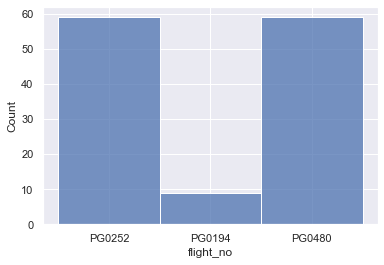

In [11]:
sns.histplot(data=flights['flight_no'])

# departure_city - Город отправления

In [12]:
flights['departure_city'].value_counts()

Anapa    127
Name: departure_city, dtype: int64

Все 127 рейса из Анапы

# arrival_city - Город прибытия

In [13]:
flights['arrival_city'].value_counts()

Moscow          59
Belgorod        59
Novokuznetsk     9
Name: arrival_city, dtype: int64

<AxesSubplot:xlabel='arrival_city', ylabel='Count'>

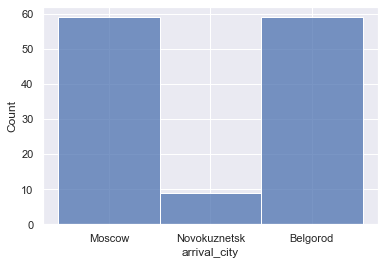

In [14]:
sns.histplot(flights['arrival_city'])

Посмотрим, какие рейсы в какие города летают

In [15]:
flights.groupby(['flight_no','arrival_city']).count()

,,flight_id,departure_city,scheduled_departure,scheduled_arrival,flight_time_minutes,model,count_economy,boarding_economy,amount_economy,count_business,boarding_business,amount_business
flight_no,arrival_city,,,,,,,,,,,,
PG0194,Novokuznetsk,9,9,9,9,9,9,9,9,9,9,9,9
PG0252,Moscow,59,59,59,59,59,59,59,59,59,59,59,59
PG0480,Belgorod,59,59,59,59,59,59,59,59,59,59,59,59


Видим, что один рейс летает в 1 город. 3 рейса, 3 города
При чем в Москву и Белгород было совершено по 59 рейсов, а в Новокузнецк только 9

Преобразуем столбец вылета в тип datetime

In [16]:
flights['scheduled_departure'] = pd.to_datetime(flights['scheduled_departure'])

In [17]:
# скорее всего запланированное время прилета нам не понадобится, удалим
flights.drop(['scheduled_arrival'], inplace=True, axis=1)

In [18]:
# Вытащим из даты месяцы и дни недели
flights['month'] = flights['scheduled_departure'].dt.month

In [19]:
flights['dayofweek'] = flights['scheduled_departure'].dt.dayofweek

Посмотрим на количество рейсов по месяцам

In [20]:
pd.DataFrame(flights.groupby(['month','flight_no'])['flight_no'].count())

flight_no
month flight_no           
1     PG0194             5
      PG0252            31
      PG0480            31
2     PG0194             4
      PG0252            28
      PG0480            28

Странно, летали только в январе и феврале.
В декабре нет ни одного рейса

In [21]:
flights.groupby(['dayofweek','flight_no']).flight_no.count()

dayofweek  flight_no
0          PG0252       9
           PG0480       9
1          PG0194       9
           PG0252       9
           PG0480       9
2          PG0252       8
           PG0480       8
3          PG0252       8
           PG0480       8
4          PG0252       8
           PG0480       8
5          PG0252       8
           PG0480       8
6          PG0252       9
           PG0480       9
Name: flight_no, dtype: int64

# flight_time_minutes - Время полета

In [22]:
flights['flight_time_minutes'].value_counts()

50     34
100    27
99     17
51     15
49     10
101     8
98      4
102     2
310     2
311     1
312     1
299     1
307     1
305     1
304     1
302     1
103     1
Name: flight_time_minutes, dtype: int64

Среднее время рейса

In [23]:
flights.groupby(['flight_no','arrival_city']).flight_time_minutes.mean()


flight_no  arrival_city
PG0194     Novokuznetsk   306.7
PG0252     Moscow          99.8
PG0480     Belgorod        50.1
Name: flight_time_minutes, dtype: float64

# model - Модель самолета

In [24]:
flights['model'].value_counts()

Boeing 737-300         68
Sukhoi Superjet-100    59
Name: model, dtype: int64

Рейсы совершаются только на двух моделях самолетов
Boeing 737-300 и Superjet-100

In [25]:
# Посчитаем общее кол-во посадочных мест в самолетоах
flights['seats_count'] = flights['count_economy'] + flights['count_business']
# Посчитаем общую загоузку самолетов
flights['boarding_count'] = flights['boarding_economy'] + flights['boarding_business']
# Посчитаем общую сумму проданных билетов (доход)
flights['total_amount'] = flights['amount_economy'] + flights['amount_business']

# посчитаем расход
- Boeing 737-300 - 2400 кг/час (40 кг/мин)
- Superjet - 1700 кг/час (28.3 кг/мин

[Расход топлива у самолётов](http://newsruss.ru/doc/index.php/%D0%A0%D0%B0%D1%81%D1%85%D0%BE%D0%B4_%D1%82%D0%BE%D0%BF%D0%BB%D0%B8%D0%B2%D0%B0_%D1%83_%D1%81%D0%B0%D0%BC%D0%BE%D0%BB%D1%91%D1%82%D0%BE%D0%B2)

- Стоимость топлива на январь 2017 - 41 435  руб за тонну (41.4 за кг)

[ЦЕНЫ НА АВИАГСМ В 2017 ГОДУ](https://favt.gov.ru/dejatelnost-ajeroporty-i-ajerodromy-ceny-na-aviagsm/?id=7329)

In [26]:
flights['fc'] = flights['model'].apply(lambda fc: 40 if fc == 'Boeing 737-300' else 28.3)

In [27]:
flights['cost'] = flights['fc'] * 41.4 * flights['flight_time_minutes']

Посчитаем прибыльность рейса

Стоиомость билетов - стоимость топлива на рейс

In [28]:
flights['profit'] = flights['total_amount'] - flights['cost']

In [29]:
flights.describe()

,flight_id,flight_time_minutes,count_economy,boarding_economy,amount_economy,count_business,boarding_business,amount_business,month,dayofweek,seats_count,boarding_count,total_amount,fc,cost,profit
count,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0
mean,"136,533.6",91.4,102.7,84.4,"817,275.6",12.0,10.0,"275,855.9",1.5,2.8,114.7,94.4,"1,093,131.5",34.6,"140,051.5","953,080.0"
std,252.5,64.4,16.5,27.0,"436,962.9",0.0,3.1,"120,638.9",0.5,2.0,16.5,29.6,"552,533.5",5.9,"114,308.4","577,657.7"
min,"136,119.0",49.0,85.0,0.0,0.0,12.0,0.0,0.0,1.0,0.0,97.0,0.0,0.0,28.3,"57,409.4","-516,672.0"
25%,"136,313.0",50.0,85.0,78.0,"494,100.0",12.0,10.0,"207,900.0",1.0,1.0,97.0,89.5,"714,600.0",28.3,"58,581.0","655,433.2"
50%,"136,540.0",99.0,118.0,85.0,"538,500.0",12.0,11.0,"226,800.0",1.0,3.0,130.0,97.0,"765,300.0",40.0,"163,944.0","706,719.0"
75%,"136,757.5",100.0,118.0,101.0,"1,238,200.0",12.0,12.0,"402,600.0",2.0,5.0,130.0,110.0,"1,610,300.0",40.0,"165,600.0","1,445,528.0"
max,"136,956.0",312.0,118.0,118.0,"1,446,800.0",12.0,12.0,"439,200.0",2.0,6.0,130.0,130.0,"1,886,000.0",40.0,"516,672.0","1,720,400.0"


In [30]:
flights.groupby(['flight_no','model','arrival_city']).profit.sum()

flight_no  model                arrival_city
PG0194     Boeing 737-300       Novokuznetsk   -4,570,560.0
PG0252     Boeing 737-300       Moscow         87,158,160.0
PG0480     Sukhoi Superjet-100  Belgorod       38,453,562.9
Name: profit, dtype: float64

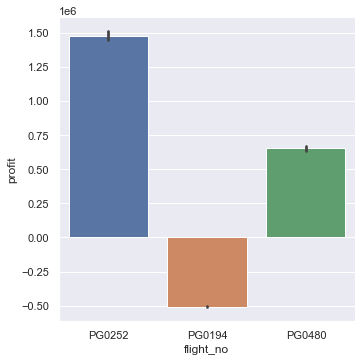

In [31]:
sns.catplot(data=flights, y='profit', x='flight_no', kind='bar')


<AxesSubplot:>

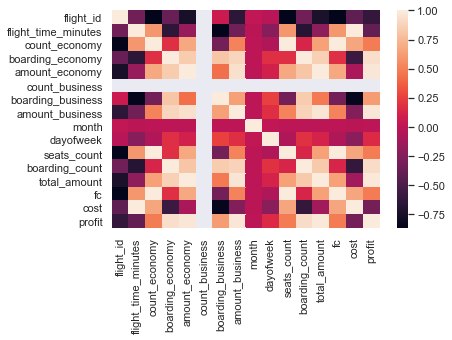

In [32]:
sns.heatmap(flights.corr())

Вывод:

Если нет ошибки в данных, что стоит проверить, то имеет смысл отказаться от рейсов:

In [33]:
flights[(flights['flight_no'] == 'PG0194')]

,flight_id,flight_no,departure_city,arrival_city,scheduled_departure,flight_time_minutes,model,count_economy,boarding_economy,amount_economy,count_business,boarding_business,amount_business,month,dayofweek,seats_count,boarding_count,total_amount,fc,cost,profit
59,136511,PG0194,Anapa,Novokuznetsk,2017-02-21 06:10:00,310,Boeing 737-300,118,0,0,12,0,0,2,1,130,0,0,40.0,"513,360.0","-513,360.0"
60,136513,PG0194,Anapa,Novokuznetsk,2017-02-28 06:10:00,310,Boeing 737-300,118,0,0,12,0,0,2,1,130,0,0,40.0,"513,360.0","-513,360.0"
61,136514,PG0194,Anapa,Novokuznetsk,2017-02-07 06:10:00,299,Boeing 737-300,118,0,0,12,0,0,2,1,130,0,0,40.0,"495,144.0","-495,144.0"
62,136523,PG0194,Anapa,Novokuznetsk,2017-01-10 06:10:00,312,Boeing 737-300,118,0,0,12,0,0,1,1,130,0,0,40.0,"516,672.0","-516,672.0"
63,136540,PG0194,Anapa,Novokuznetsk,2017-01-17 06:10:00,307,Boeing 737-300,118,0,0,12,0,0,1,1,130,0,0,40.0,"508,392.0","-508,392.0"
64,136544,PG0194,Anapa,Novokuznetsk,2017-01-31 06:10:00,304,Boeing 737-300,118,0,0,12,0,0,1,1,130,0,0,40.0,"503,424.0","-503,424.0"
65,136546,PG0194,Anapa,Novokuznetsk,2017-01-03 06:10:00,302,Boeing 737-300,118,0,0,12,0,0,1,1,130,0,0,40.0,"500,112.0","-500,112.0"
66,136560,PG0194,Anapa,Novokuznetsk,2017-01-24 06:10:00,305,Boeing 737-300,118,0,0,12,0,0,1,1,130,0,0,40.0,"505,080.0","-505,080.0"
67,136567,PG0194,Anapa,Novokuznetsk,2017-02-14 06:10:00,311,Boeing 737-300,118,0,0,12,0,0,2,1,130,0,0,40.0,"515,016.0","-515,016.0"
